# Section 1: Data Overview
Time spent: 1 hr 5m

-----

## Source a: _"Extracted bank account statements of various bank accounts"_
* Description: Consolidated and extracted bank account statments available via open source at the following link https://www.kaggle.com/apoorvwatsky/bank-transaction-data?select=bank.xlsx
* Goal was to categorise similar transactions via text data on narratives for the purpose of detecting criminal and fraudulent activity. 
* File name: _"bank.xlsx"_
* Obtained via direct web download, no scraping needed.


### Features:
* Account number
* Date
* Narrative
* Date
* Withdrawal / deposit 
* Amount 
* Balance

## Source b: _"1999 Czech Financial Dataset - Real Anonymized Transactions"_
* Description: Data from a real Czech bank covering accounts from 1999. Several different sub-datasets are available covering loans, transactions, clients, credit cards etc. Here we focus only on the transaction dataset. 
https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions
* File name: _"trans.csv"_
* Obtained via direct web download, no scraping needed.

### Features:
* Date
* Type
* Operation
* Amount
* Balance 
* Symbol 
* Bank
* Account

## Source c: _"Development Credit Authority (DCA) Data Set: Loan Transactions"_
* Description: USAID's Development Credit Authority (DCA) works with investors, local financial institutions, and development organizations to design and deliver investment alternatives that unlock financing for U.S. Government priorities. USAID guarantees encourage private lenders to extend financing to underserved borrowers in new sectors and regions. 
* Data lists all private loans made under USAID's DCA since 1999. 
https://data.world/usaid/dca-loan-transactions
* File name: _"userssharedsdfusaiddevelopmentcagloantransactions.csv"_
* Obtained via direct web download, no scraping needed.

### Features:
* Country
* Amount (USD)
* Original currency
* Date
* Sector 
* Town / City 
* Female owned business receiving loan (dummy variable)
* First time borrower business (dummy variable)

-----

# Section 2: Exploratory Data Analysis
Time spent: 2 hr  12 min

-----

In [1]:
# Import various libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from datetime import datetime
import math
import statistics

In [2]:
# Load Dataset of Interest
loan_transaction_data = pd.read_csv("userssharedsdfusaiddevelopmentcagloantransactions.csv")

In [3]:
# Overview of Data Structure
print('Size of loan transaction data', loan_transaction_data.shape)

Size of loan transaction data (163795, 17)


In [4]:
# Summary Statistics
loan_transaction_data.describe(include='all')

,Guarantee Number,Transaction Report ID,Guarantee Country Name,Amount (USD),Currency Name,End Date,Business Sector,City/Town,State/Province/Region Name,State/Province/Region Code,State/Province/Region Country Name,Region Name,Latitude,Longitude,Is Woman Owned?,Is First Time Borrower?,Business Size
count,163795,163795.000000,163795,1.637950e+05,163795,163795,155932,124728,122798,122798,122798,122798,92430.000000,92430.000000,163795.000000,163795.000000,31069
unique,400,NaN,76,NaN,72,6403,15,7081,863,884,72,5,NaN,NaN,NaN,NaN,5
top,523DCAA00010001100,NaN,Colombia,NaN,COLOMBIA - PESO,2/21/2004,Agriculture,Tarapoto,San Martin,PE22,Colombia,LATIN AMERICA & THE CARIBBEAN,NaN,NaN,NaN,NaN,1--5
freq,18192,NaN,21647,NaN,21648,1617,62818,6691,9165,9165,21642,90895,NaN,NaN,NaN,NaN,26770
mean,NaN,288877.498623,NaN,1.160283e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.131426,-46.287197,0.338722,0.306066,NaN
std,NaN,128342.116008,NaN,3.037087e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.288662,59.197727,54.556436,1.149152,NaN
min,NaN,18215.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.822297,-99.250000,0.000000,0.000000,NaN
25%,NaN,189520.500000,NaN,4.869339e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.350694,-76.957418,0.000000,0.000000,NaN
50%,NaN,286887.000000,NaN,9.805844e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.337315,-75.583333,0.000000,0.000000,NaN
75%,NaN,379022.500000,NaN,2.141828e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.041682,-61.733333,0.000000,1.000000,NaN


Notice the key variable of interest; loan amount (USD), has undergone some currency conversions resulting in normal form notation for amoutns which were originally true currency amounts. Hence, happy to accept a two decimal place accuracy of currency conversions we create a rounded version for easier interpretation.

In [5]:
# Rounded version of amount USD due to currency conversions
loan_transaction_data['Amount (USD) (rounded)'] = round(loan_transaction_data['Amount (USD)'], 2).replace(0, np.nan)
loan_transaction_data['Log Amount'] = np.log(loan_transaction_data['Amount (USD) (rounded)'])

In [6]:
# Glimpse
loan_transaction_data.head()

,Guarantee Number,Transaction Report ID,Guarantee Country Name,Amount (USD),Currency Name,End Date,Business Sector,City/Town,State/Province/Region Name,State/Province/Region Code,State/Province/Region Country Name,Region Name,Latitude,Longitude,Is Woman Owned?,Is First Time Borrower?,Business Size,Amount (USD) (rounded),Log Amount
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,9.872727e+05,PERU - NUEVO SOL,9/9/2013,NaN,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,-13.518333,-71.978056,0,1,>100,987272.73,13.802702
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1.974545e+06,PERU - NUEVO SOL,9/4/2014,NaN,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,-15.000000,-70.000000,0,0,>100,1974545.46,14.495849
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,1.992565e+06,PERU - NUEVO SOL,8/5/2013,NaN,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,-12.000000,-76.833333,0,1,>100,1992565.06,14.504933
3,099-DCA-09-006D (Pro Mujer Peru),385807,Worldwide,1.000000e+06,PERU - NUEVO SOL,3/31/2015,NaN,Puno,NaN,NaN,NaN,NaN,NaN,NaN,0,0,>100,1000000.00,13.815511
4,099-DCA-09-006F (COCLA),473058,Worldwide,1.780000e+06,UNITED STATES - DOLLAR,8/20/2014,NaN,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,-13.518333,-71.978056,0,0,NaN,1780000.00,14.392124


In [7]:
# Function for missing data overview
def miss_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    percent = round(percent,2)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print( missing_df.head(20))
    return None
miss_data(loan_transaction_data)

                                     Total  Percent
Business Size                       132726    81.03
Longitude                            71365    43.57
Latitude                             71365    43.57
State/Province/Region Code           40997    25.03
State/Province/Region Name           40997    25.03
Region Name                          40997    25.03
State/Province/Region Country Name   40997    25.03
City/Town                            39067    23.85
Business Sector                       7863     4.80
Log Amount                               7     0.00
Amount (USD) (rounded)                   7     0.00
Is Woman Owned?                          0     0.00
Is First Time Borrower?                  0     0.00
End Date                                 0     0.00
Currency Name                            0     0.00
Amount (USD)                             0     0.00
Guarantee Country Name                   0     0.00
Transaction Report ID                    0     0.00
Guarantee Nu

Here we make some key observations:
* Largely categorical data presenting a potential sample selection issue. Initial quantitative analysis on transaction amounts can be done on a complete sample.
* Potential biases for or against both first time borrowers and female owned companies possible on entire sample.
* Business sector analysis can also be done on a large proportion of the data.
* More granular analyses investigating transaction patterns regionally will require an approach to deal with missing data.

In [8]:
# What variable types do we have?
def cols(df):
    # Initialise empty placeholder
    col_desc = []
    for col in df.columns:
        col_desc.append((col, df[col].dtype))
    col_desc_df = pd.DataFrame(col_desc, columns=['Column', 'Type'])
    return col_desc_df
cols(loan_transaction_data)

,Column,Type
0,Guarantee Number,object
1,Transaction Report ID,int64
2,Guarantee Country Name,object
3,Amount (USD),float64
4,Currency Name,object
5,End Date,object
6,Business Sector,object
7,City/Town,object
8,State/Province/Region Name,object
9,State/Province/Region Code,object


In [9]:
# Create some additional variables of Interest
# Actual Date format, to then get years, monthly, quarterly etc
loan_transaction_data['Date'] = pd.to_datetime(loan_transaction_data['End Date'])
loan_transaction_data['Year'] = loan_transaction_data['Date'].dt.year
loan_transaction_data['Quarter'] = loan_transaction_data['Date'].dt.quarter

In [10]:
loan_transaction_data.head()

,Guarantee Number,Transaction Report ID,Guarantee Country Name,Amount (USD),Currency Name,End Date,Business Sector,City/Town,State/Province/Region Name,State/Province/Region Code,...,Latitude,Longitude,Is Woman Owned?,Is First Time Borrower?,Business Size,Amount (USD) (rounded),Log Amount,Date,Year,Quarter
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,9.872727e+05,PERU - NUEVO SOL,9/9/2013,NaN,Cusco,Cusco,PE08,...,-13.518333,-71.978056,0,1,>100,987272.73,13.802702,2013-09-09,2013,3
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1.974545e+06,PERU - NUEVO SOL,9/4/2014,NaN,Puno,Puno,PE21,...,-15.000000,-70.000000,0,0,>100,1974545.46,14.495849,2014-09-04,2014,3
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,1.992565e+06,PERU - NUEVO SOL,8/5/2013,NaN,Lima,Lima,PE15,...,-12.000000,-76.833333,0,1,>100,1992565.06,14.504933,2013-08-05,2013,3
3,099-DCA-09-006D (Pro Mujer Peru),385807,Worldwide,1.000000e+06,PERU - NUEVO SOL,3/31/2015,NaN,Puno,NaN,NaN,...,NaN,NaN,0,0,>100,1000000.00,13.815511,2015-03-31,2015,1
4,099-DCA-09-006F (COCLA),473058,Worldwide,1.780000e+06,UNITED STATES - DOLLAR,8/20/2014,NaN,Cusco,Cusco,PE08,...,-13.518333,-71.978056,0,0,NaN,1780000.00,14.392124,2014-08-20,2014,3


In [11]:
# Filter the Datasize for Workability and task magnitude - Focus on transactions in the Euro Zone and US Only
ltd_focus = loan_transaction_data[loan_transaction_data['Currency Name'].str.contains("EURO|UNITED STATES")]
ltd_focus.shape

(23480, 22)

In [12]:
# Remove some peculiar values occuring
ltd_focus = ltd_focus[ltd_focus['Is Woman Owned?'].isin([0,1])]
ltd_focus = ltd_focus[ltd_focus['Is First Time Borrower?'].isin([0,1])]

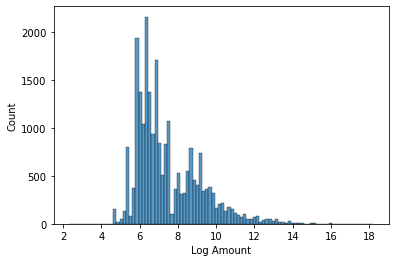

In [13]:
# Initial Distribution of Log Amounts
sns.histplot(data=ltd_focus, x="Log Amount")
plt.show()

_We will work with the logarithm of the loan amount as the skewness in the distriubtion of nominal amounts muddies comparisons and makes only enormous differences noticable_

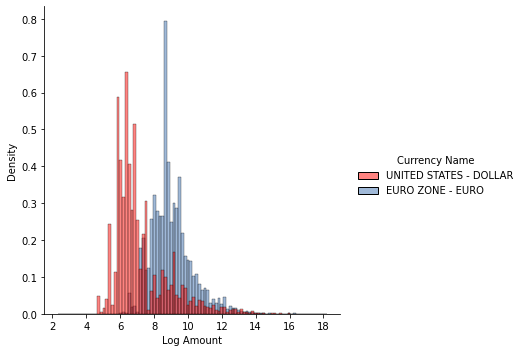

In [14]:
# Initial Distribution of Amounts by currency
colours = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colours))
sns.displot(data=ltd_focus, x="Log Amount", hue="Currency Name", stat="density", common_norm = False)
plt.show()

Here we see a _distinct_ difference in the distribution of banking loan transaction amounts for the two currencies. 
* This indicates there _may_ be some underlying _statistical_ relationship between characteristics of businsses requesting loans in these two currencies and the loan amounts requested 

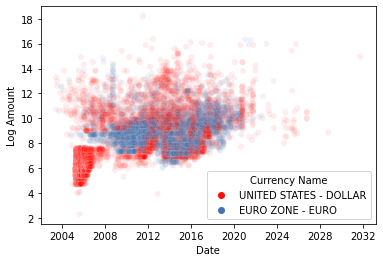

In [15]:
# What do loan amounts look like over time? (Here end of loan contract)
sns.scatterplot(data=ltd_focus, x="Date", y="Log Amount", alpha=0.075, hue="Currency Name")
plt.show()

No clear trend results in either currency plotting all the data, although quite overplotted even with dilution.

In [16]:
# Group by Year and quarter to calculate average
year_group = pd.DataFrame(ltd_focus.groupby('Year').mean())
year_cur_group = pd.DataFrame(ltd_focus.groupby(['Year', 'Currency Name']).mean())

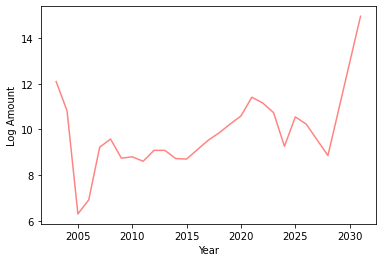

In [17]:
sns.lineplot(data=year_group, x="Year", y="Log Amount", alpha=0.5)
plt.show()

Again, no clear overall trend element across both currencies and the discontinuites in the time sample can lead to misleading, striking jumps.

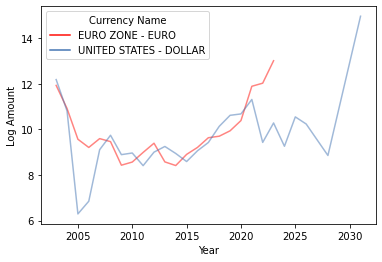

In [18]:
sns.lineplot(data=year_cur_group, x="Year", y="Log Amount", alpha=0.5, hue="Currency Name")
plt.show()

Some overall similarities in the timely evolution of lending amounts across the two currencies:
* Euro zone in particular seems to display a quadratic pattern in average loan amounts over the time period 2004-2023
* United states dollar loans also exhibit a similar pattern over that period, however this relation breaks down for loans due in the late 2020's

This could seem largely in line with knowledge of the global financial crisis that hit in 2007/08. Both these currencies and economic areas were significantly hit by drying up credit system. This could be tied to smaller average loans being offered when they were due for a few years after the crisis - 2010 - 2015 eg. 3-6 year loans. After the post crisis recovery came into swing this borrowing constraint started to relax slowly. 


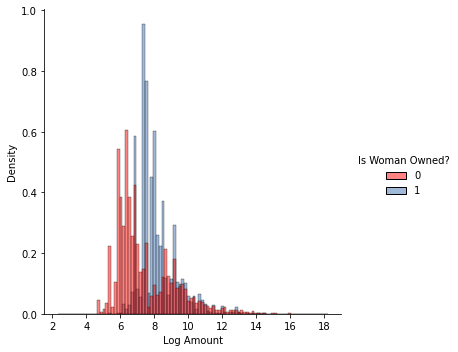

In [19]:
# How does being a first time borrower and a female business owne
sns.displot(data=ltd_focus, x="Log Amount", hue="Is Woman Owned?", stat="density", common_norm = False)
plt.show()

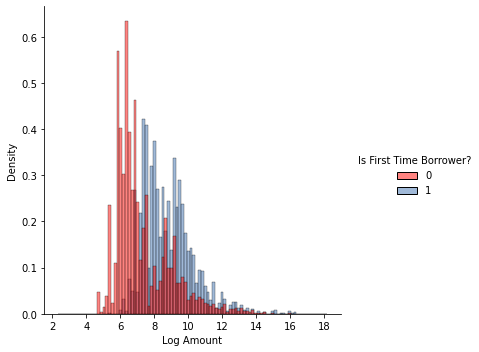

In [20]:
sns.displot(data=ltd_focus, x="Log Amount", hue="Is First Time Borrower?", stat="density", common_norm = False)
plt.show()

The distributions seem to be __largely__ spanning the same range of loan amounts for both:
* Female owners and Male owners; and
* First time borrowers and repeat borrowers.

If anything, first time borrowers appear to more often take out larger loans than those who are repeat borrowews. This could be plausible although perhaps somewhat counterintuitive at a first glance. Initial business loans may be greater in size as during early stages costs are inflated before economies of scale kick in there is more scope for large mistakes in the "start-up" phase of the business lifecycle. 

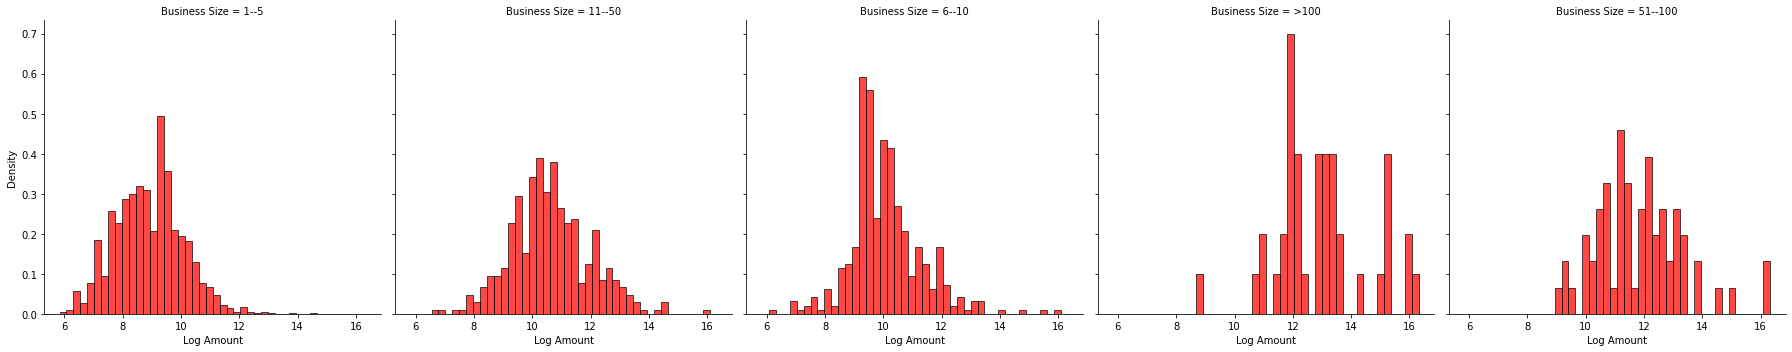

In [21]:
# What do loan amounts look like for different business sizes?
sns.displot(data=ltd_focus, x="Log Amount", col="Business Size", stat="density", common_norm = False, multiple = "dodge")
plt.show()

Evident from the above, the size of a business appears to have an impact on the potential scale of the loan:
* Larger business appear to have a much greater access to larger loan values
* This makes intuitive sense, more collateral, higher cashflow and stronger reputation reduces the default risk

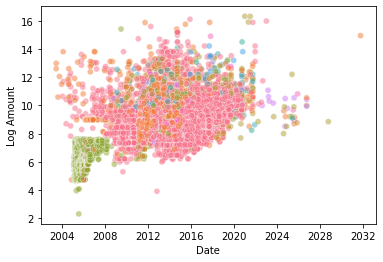

In [22]:
# What might the loans look like by business sector?
sns.scatterplot(data=ltd_focus, x="Date", y="Log Amount", alpha=0.5, hue="Business Sector", legend=False)
plt.show()

Some _significant clustering_ appears as we look at loans over time by business sector:
* Businesses seeking loans at the same time, within the same sector appear to seek similar magnitude of loans for __some__ busines sectors - green (Housing)
* Other business sectors do not see such a relationship - pink (Agriculture)

### Summary of 5 Key Educational Insights:
__* While there is a distinct difference in the distribution of loan amounts in EURO vs US DOLLAR, the overall trend pattern over time seems comparable across the currencies__

__* Female business owners do not appear to be discriminated against in the loan market in terms of obtainable loan values__

__* First time borrowers in fact appear to often borrow more money that repeat borrowers, perhaps contrary to an initial prior that they might be more restricted on credit__

__* Larger businesses get preferential access to the largest loans offered__

__* Loans appear to be very similar in magnitude for only certain business sectors, other business sectors are more varied__

# Section 3: Manipulating the Dataset
Time spent: 21 min

-----

In [ ]:
# Creating a class
class MyData:
  def __init__(filepath):
    MyData.path = filepath

In [30]:
# Standard Deviation Function
def st_dev(df, ColName):
    sd = df[ColName].std()
    print(sd)
    return None

In [31]:
st_dev(ltd_focus,"Log Amount")

1.7103175748096633


In [32]:
ltd_focus["Log Amount"].std()

1.7103175748096633

In [34]:
# Mean Function
def mean_func(df, ColName):
    mn = df[ColName].mean()
    print(mn)
    return None

In [36]:
mean_func(ltd_focus,"Log Amount")

7.47137434597656


In [51]:
# Outlier Function
def outl_func(df, ColName):
    mn = df[ColName].mean()
    sd = df[ColName].std()
    band = 3 * sd
    df["Outlier"] = abs(df[ColName]) > abs(mn + band)
    print(out)
    return None

# Section 4: Questions
Time spent: 5 min

1. What (if any) experience do you have in Cloud Services (eg. AWS, GCP)?

Unfortunately I do not have any experience in Cloud services.

2. What is your experience with building machine learning models? What packages are you familiar with?

Several independent machine learning projects I have conducted both in R and Python, but none for an employment purpose or in any professional capacity. 

The machine learning models that I have used in both these softwares are as follows: 
* Linear regression
* Logistic regression
* Linear SVC
* KNN classification

------